In [1]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA as sklearn_PCA
 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [194]:
class PCA:
    
    def __init__(self, method, svd_type=None):
        self.method = method
        self.svd_type = svd_type
        self.reduction_mat = None
    
    def fit(self, data, num_components):
        data = np.array(data)
        if self.method == 'eig':
            cov = np.cov(data, rowvar=False)            
            eig_values, eig_vecs = np.linalg.eig(cov)
            ids = np.argsort(eig_values)[::-1]
            self.reduction_mat = eig_vecs[:, ids][:, :num_components]
        elif self.method == 'svd':
            data = data - data.mean(axis=0)
            u, s, v = np.linalg.svd(data)
            if self.svd_type=='u':
                self.reduction_mat = u[:, :num_components]*s[:num_components]
            elif self.svd_type=='v':
                self.reduction_mat = v.T[:, :num_components]
        
    def transform(self, x):  
        if self.method=='eig':
            return np.dot(x, self.reduction_mat)
        elif self.method=='svd':
            if self.svd_type=='u':
                return self.reduction_mat
            elif self.svd_type=='v':
                x = x - x.mean(axis=0)
                return np.dot(x, self.reduction_mat)


In [195]:
data = datasets.load_iris()
data, labels = data.data, data.target

#we will take only 3 features to visualize data
data = data[:, :3]

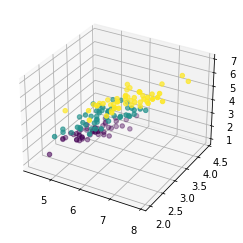

In [196]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels)

In [197]:
pc = PCA(method='eig', svd_type='v')
pc.fit(data, 2)
transformed_data = pc.transform(data)

sklearn_pc = sklearn_PCA(2)
sklearn_pc.fit(data)
sklearn_transformed_data = sklearn_pc.transform(data)

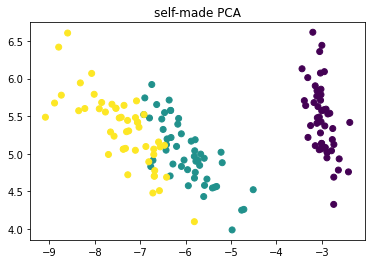

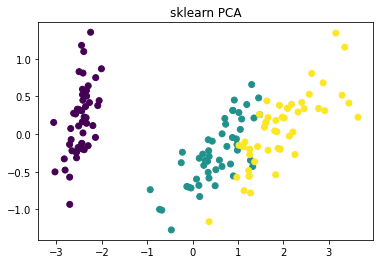

In [198]:
plt.figure(1)
plt.title('self-made PCA')
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)

plt.figure(2)
plt.title('sklearn PCA')
plt.scatter(sklearn_transformed_data[:, 0], sklearn_transformed_data[:, 1], c=labels)